In [ ]:
import numpy as np
import mne 

subjects = [f"S{i:02}" for i in range(1, 21)]
#Set 1 if you want to include miniepochs with a pre-onset period
BaselineData = 1
#Set to 0 to look at data trained on the early peak response, 1 to look at data trained on late peak response
Peak = 0
if Peak == 0:
    timing = 'Early'
else:
    timing = 'Late'
bids_dir = '/System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/'
data_path = f'/System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/!Important Data/errors/'
# Dictionary to store data for each subject
subject_data = {}

for Subject in subjects:
    if BaselineData == 1:
        fn_Subject = f'{Subject}_Errors{timing}BaselineIncluded.npy'
    else:
        fn_Subject = f'{Subject}_Errors{timing}.npy'
    if BaselineData == 1:
        fn_miniepochs = f'sub-{Subject}_miniEpochsBaselineIncluded_preprocessed-epo.fif'
    else:
        fn_miniepochs = f'sub-{Subject}_miniEpochs_preprocessed-epo.fif'
    epochs_mini = mne.read_epochs(bids_dir + fn_miniepochs)
    errors = np.load(data_path + 'data/' + fn_Subject)
    
    subject_data[Subject] = {
        'epochs_mini': epochs_mini,
        'errors': errors
    }

# Print shape and first few lines of errors arrays for comparison
for Subject in subjects:
    errors = subject_data[Subject]['errors']
    print(f"Subject {Subject}: Shape {errors.shape}")
    print(errors[:5])  # Print first 5 lines for inspection

Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S01_miniEpochsBaselineIncluded_preprocessed-epo.fif ...
    Found the data of interest:
        t =       0.00 ...      49.17 ms
        0 CTF compensation matrices available
Adding metadata with 6 columns
28672 matching events found
No baseline correction applied
0 projection items activated
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S02_miniEpochsBaselineIncluded_preprocessed-epo.fif ...
    Found the data of interest:
        t =       0.00 ...      49.17 ms
        0 CTF compensation matrices available
Adding metadata with 6 columns
28672 matching events found
No baseline correction applied
0 projection items activated
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S03_miniEpochsBaselineIncluded_preprocessed-epo.fif ...
    Foun

: 

In [2]:
s01_errors = subject_data["S01"]["errors"]
trialmat = subject_data["S01"]["epochs_mini"].metadata

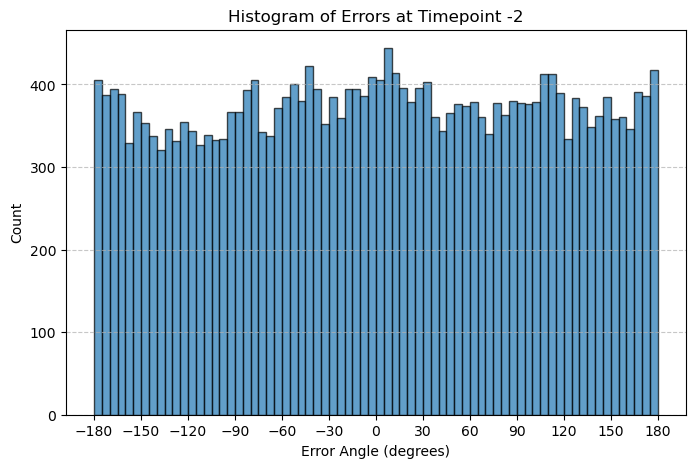

In [10]:
import numpy as np
import matplotlib.pyplot as plt

s01_errors = subject_data["S01"]["errors"]
trialmat = subject_data["S01"]["epochs_mini"].metadata

tp = -2

time_idx = trialmat[trialmat.timepoints == tp].index.to_numpy()
toplot = s01_errors[time_idx, :].flatten()

angle_error = np.arange(-180, 185, 5)

counts, bin_edges = np.histogram(toplot, bins=angle_error)

# Compute bin centers for proper plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot histogram
plt.figure(figsize=(8, 5))
plt.bar(bin_centers, counts, width=5, edgecolor="black", alpha=0.7)
plt.xlabel("Error Angle (degrees)")
plt.ylabel("Count")
plt.title(f"Histogram of Errors at Timepoint {tp}")
plt.xticks(np.arange(-180, 181, 30))  # Adjust x-axis ticks for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


(array([520., 509., 544., 522., 516., 511., 545., 567., 618., 560., 606.,
        639., 557., 550., 555., 515., 550., 532., 544., 563., 527., 500.,
        536., 562., 558., 553., 588., 555., 523., 515., 506., 527., 502.,
        543., 558., 539., 533., 553., 485., 428., 503., 526., 493., 469.,
        526., 510., 519., 550., 552., 618.]),
 array([-1.79991437e+02, -1.72791877e+02, -1.65592317e+02, -1.58392757e+02,
        -1.51193198e+02, -1.43993638e+02, -1.36794078e+02, -1.29594518e+02,
        -1.22394958e+02, -1.15195398e+02, -1.07995839e+02, -1.00796279e+02,
        -9.35967189e+01, -8.63971591e+01, -7.91975992e+01, -7.19980394e+01,
        -6.47984796e+01, -5.75989197e+01, -5.03993599e+01, -4.31998001e+01,
        -3.60002402e+01, -2.88006804e+01, -2.16011205e+01, -1.44015607e+01,
        -7.20200088e+00, -2.44104007e-03,  7.19711880e+00,  1.43966786e+01,
         2.15962385e+01,  2.87957983e+01,  3.59953581e+01,  4.31949180e+01,
         5.03944778e+01,  5.75940376e+01,  6.47935

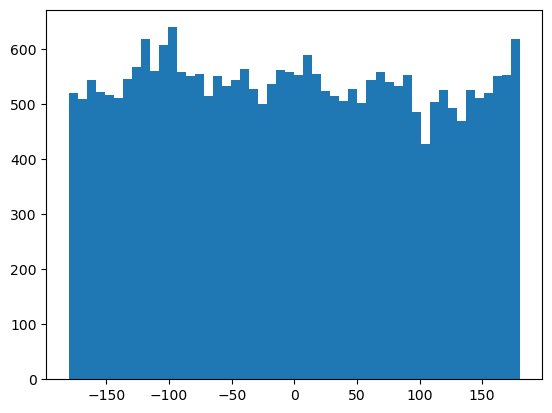

In [4]:
s01_errors = subject_data["S01"]["errors"]
trialmat = subject_data["S01"]["epochs_mini"].metadata

tp = 0

time_idx = trialmat[trialmat.timepoints == tp].index.to_numpy()
toplot = s01_errors[time_idx, :].flatten()
plt.hist(toplot, bins = 50)

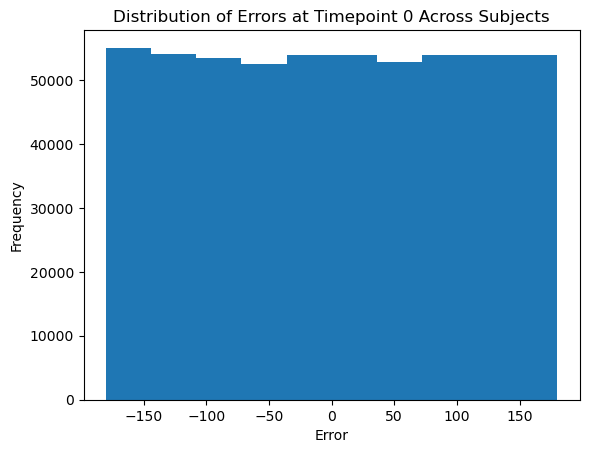

In [23]:
import numpy as np
import matplotlib.pyplot as plt

tp = 0
all_errors = []

for subj in subject_data.keys():  # Loop over all subjects
    errors = subject_data[subj]["errors"]
    trialmat = subject_data[subj]["epochs_mini"].metadata
    
    time_idx = trialmat[trialmat.timepoints == tp].index.to_numpy()
    toplot = errors[time_idx, :].flatten()
    
    all_errors.append(toplot)

# Combine errors 
all_errors = np.concatenate(all_errors)

# Plot histogram
plt.hist(all_errors, bins = 10) # Adjust bins as needed
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title(f"Distribution of Errors at Timepoint {tp} Across Subjects")
plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt

all_counts = np.zeros(len(angle_error) - 1)  # Initialize array for summed counts

tp = -3  # Timepoint


# Loop through subjects and accumulate histogram counts
for subj in subject_data.keys():
    s_errors = subject_data[subj]["errors"]
    trialmat = subject_data[subj]["epochs_mini"].metadata

    # Get relevant indices for the given timepoint
    time_idx = trialmat[trialmat.timepoints == tp].index.to_numpy()

    # Flatten errors at this timepoint
    toplot = s_errors[time_idx, :].flatten()

    # Compute histogram and sum counts across subjects
    counts = np.histogram(toplot)
    all_counts += counts  # Accumulate histogram counts

# Normalize by the number of subjects
num_subjects = len(subject_data)
all_counts /= num_subjects  # Compute mean histogram counts

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(all_counts)
plt.xlabel("Error Angle (degrees)")
plt.ylabel("Average Count")
plt.title(f"Average Histogram of Errors at Timepoint {tp}")

plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

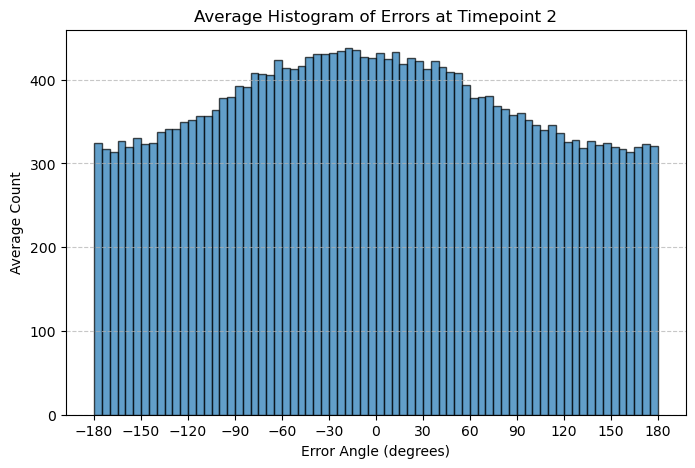

In [8]:
import numpy as np
import matplotlib.pyplot as plt

angle_error = np.arange(-180, 185, 5)  # Bin edges
all_counts = np.zeros(len(angle_error) - 1)  # Initialize array for summed counts

tp = 2  # Timepoint


# Loop through subjects and accumulate histogram counts
for subj in subject_data.keys():
    s_errors = subject_data[subj]["errors"]
    trialmat = subject_data[subj]["epochs_mini"].metadata

    # Get relevant indices for the given timepoint
    time_idx = trialmat[trialmat.timepoints == tp].index.to_numpy()

    # Flatten errors at this timepoint
    toplot = s_errors[time_idx, :].flatten()

    # Compute histogram and sum counts across subjects
    counts, _ = np.histogram(toplot, bins=angle_error)
    all_counts += counts  # Accumulate histogram counts

# Compute bin centers for proper plotting
bin_centers = (angle_error[:-1] + angle_error[1:]) / 2

# Normalize by the number of subjects
num_subjects = len(subject_data)
all_counts /= num_subjects  # Compute mean histogram counts

# Plot histogram
plt.figure(figsize=(8, 5))
plt.bar(bin_centers, all_counts, width=5, edgecolor="black", alpha=0.7)
plt.xlabel("Error Angle (degrees)")
plt.ylabel("Average Count")
plt.title(f"Average Histogram of Errors at Timepoint {tp}")
plt.xticks(np.arange(-180, 181, 30))  # Adjust x-axis ticks for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


Movie saved as 'histogram_movie.mp4'


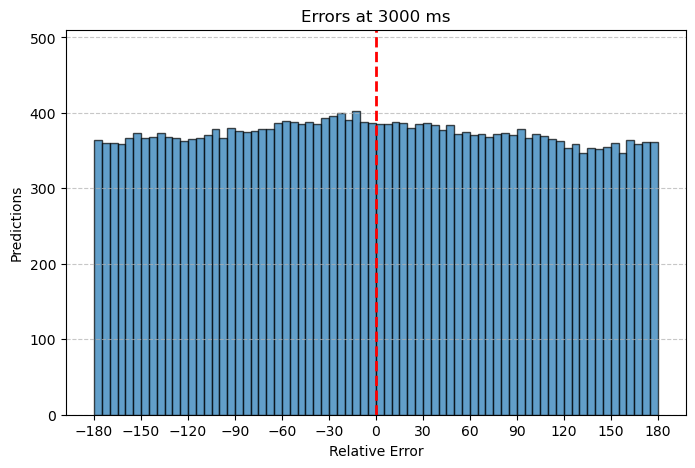

In [9]:
from matplotlib.animation import FFMpegWriter
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 5))

# Create a function to update the histogram for each timepoint
def update_histogram(timepoint):

# Loop through subjects and accumulate histogram counts
    angle_error = np.arange(-180, 185, 5)
    all_counts = np.zeros(len(angle_error) - 1)  # Reset for each timepoint

    for subj in subject_data.keys():
        s_errors = subject_data[subj]["errors"]
        trialmat = subject_data[subj]["epochs_mini"].metadata

        # Get relevant indices for the given timepoint
        time_idx = trialmat[trialmat.timepoints == timepoint].index.to_numpy()

        # Flatten errors at this timepoint
        toplot = s_errors[time_idx, :].flatten()

        # Compute histogram and sum counts across subjects
        counts, _ = np.histogram(toplot, bins=angle_error)
        all_counts += counts  # Accumulate histogram counts

    # Compute bin centers for proper plotting
    bin_centers = (angle_error[:-1] + angle_error[1:]) / 2

    # Normalize by the number of subjects
    num_subjects = len(subject_data)
    all_counts /= num_subjects  # Compute mean histogram counts
    # Plot histogram
    ax.clear()
    plt.axvline(0, color="red", linestyle="--", linewidth=2)  # Add vertical line at 0
    plt.bar(bin_centers, all_counts, width=5, edgecolor="black", alpha=0.7)
    plt.xlabel("Relative Error")
    plt.ylabel("Predictions")
    plt.title(f"Errors at {(timepoint + 1) * 50} ms")
    plt.xticks(np.arange(-180, 181, 30))  # Adjust x-axis ticks for readability
    plt.grid(axis="y", linestyle="--", alpha=0.7)


# Set up the movie writer
writer = FFMpegWriter(fps=1)  # Set fps to control speed of the movie

# Open a video file
with writer.saving(fig, "Bayesianerror_movie.mp4", dpi=200):
    for tp in range(0, 60):  # Timepoints from 0 to 59
        update_histogram(tp)  # Update the histogram for the current timepoint
        writer.grab_frame()  # Capture the current frame

print("Movie saved as 'histogram_movie.mp4'")

In [13]:
print(len(subject_data["S01"]["errors"]))

28672


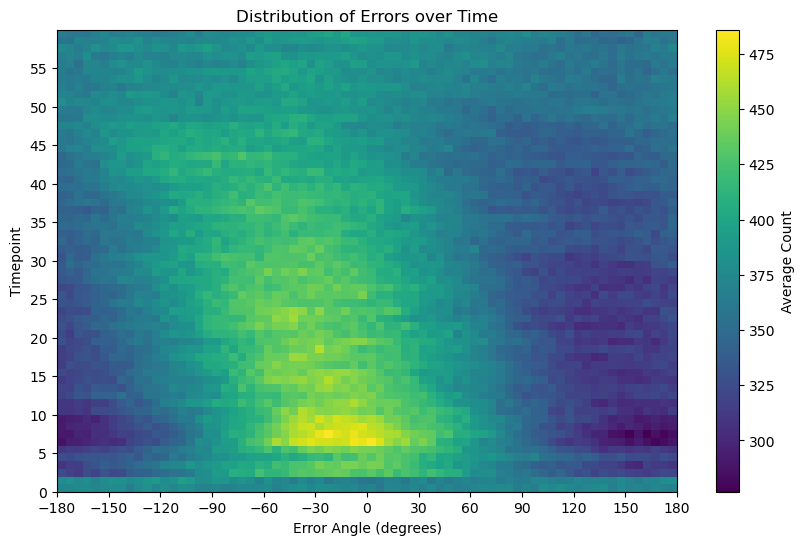

In [11]:
import numpy as np
import matplotlib.pyplot as plt

angle_error = np.arange(-180, 185, 5)  # Bin edges
num_timepoints = 60  # Adjust based on your data
num_subjects = len(subject_data)

# Initialize matrix to store histogram counts for each timepoint
hist_matrix = np.zeros((num_timepoints, len(angle_error) - 1))

# Loop through timepoints and subjects to build the matrix
for tp in range(num_timepoints):
    all_counts = np.zeros(len(angle_error) - 1)  # Reset for each timepoint

    for subj in subject_data.keys():
        s_errors = subject_data[subj]["errors"]
        trialmat = subject_data[subj]["epochs_mini"].metadata

        time_idx = trialmat[trialmat.timepoints == tp].index.to_numpy()
        toplot = s_errors[time_idx, :].flatten()

        counts, _ = np.histogram(toplot, bins=angle_error)
        all_counts += counts  # Accumulate counts

    hist_matrix[tp, :] = all_counts / num_subjects  # Normalize by number of subjects

# Plot heatmap
plt.figure(figsize=(10, 6))
plt.imshow(hist_matrix, aspect="auto", cmap="viridis", 
           extent=[-180, 180, 0, num_timepoints], origin="lower")

plt.colorbar(label="Average Count")
plt.xlabel("Error Angle (degrees)")
plt.ylabel("Timepoint")
plt.title("Distribution of Errors over Time")
plt.xticks(np.arange(-180, 181, 30))  # Adjust x-axis ticks
plt.yticks(np.arange(0, num_timepoints, 5))  # Adjust y-axis ticks
plt.show()


In [8]:
print(subject_data[subjects[0]]['epochs_mini'].metadata['timepoints'])

0         0
1         0
2         0
3         0
4         0
         ..
26875    59
26876    59
26877    59
26878    59
26879    59
Name: timepoints, Length: 26880, dtype: int64


[-1 -2 -3 -4  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]


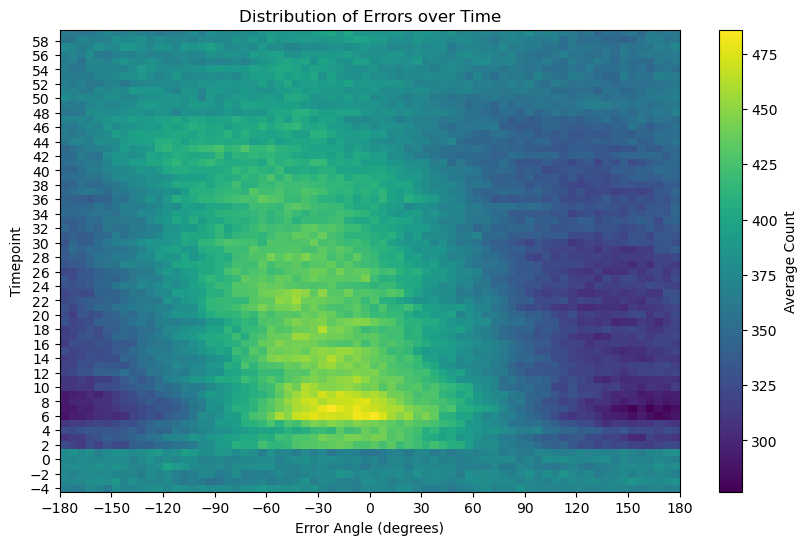

In [12]:
# Step 1: Get all timepoints
all_timepoints = subject_data[subjects[0]]['epochs_mini'].metadata['timepoints'].unique()
print(all_timepoints)
all_timepoints = np.sort(all_timepoints)
num_timepoints = len(all_timepoints)


# Step 2: Create histogram matrix
hist_matrix = np.zeros((num_timepoints, len(angle_error) - 1))

# Step 3: Loop through timepoints
for idx, tp in enumerate(all_timepoints):
    all_counts = np.zeros(len(angle_error) - 1)

    for subj in subject_data.keys():
        s_errors = subject_data[subj]["errors"]
        trialmat = subject_data[subj]["epochs_mini"].metadata

        time_idx = trialmat[trialmat.timepoints == tp].index.to_numpy()
        toplot = s_errors[time_idx, :].flatten()

        counts, _ = np.histogram(toplot, bins=angle_error)
        all_counts += counts

    hist_matrix[idx, :] = all_counts / num_subjects

# Step 4: Plot
plt.figure(figsize=(10, 6))
plt.imshow(hist_matrix, aspect="auto", cmap="viridis", 
           extent=[-180, 180, all_timepoints[0] - 0.5, all_timepoints[-1] + 0.5],
           origin="lower")
plt.colorbar(label="Average Count")
plt.xlabel("Error Angle (degrees)")
plt.ylabel("Timepoint")
plt.title("Distribution of Errors over Time")
plt.xticks(np.arange(-180, 181, 30))
plt.yticks(all_timepoints[::2])
plt.show()


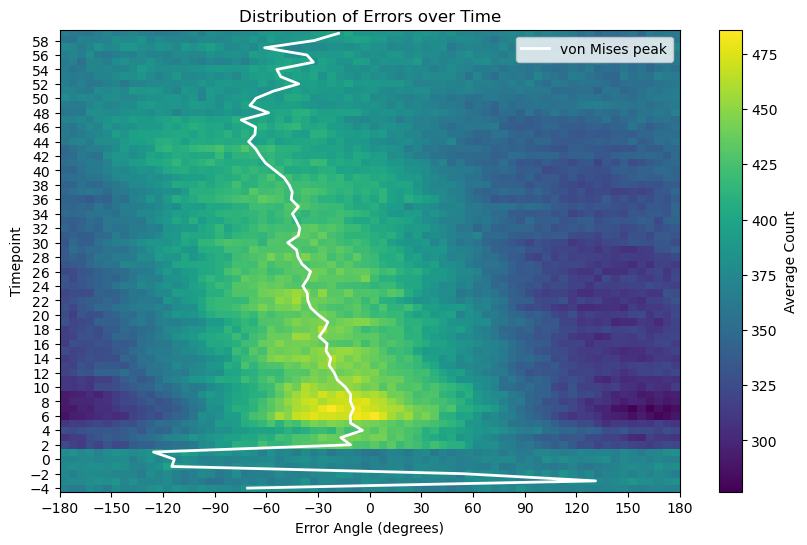

In [23]:
from scipy.stats import vonmises
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Get all timepoints
all_timepoints = subject_data[subjects[0]]['epochs_mini'].metadata['timepoints'].unique()
all_timepoints = np.sort(all_timepoints)
num_timepoints = len(all_timepoints)

# Step 2: Create histogram matrix
hist_matrix = np.zeros((num_timepoints, len(angle_error) - 1))
peak_angles = np.zeros(num_timepoints)  # Store peak angle per timepoint

# Step 3: Loop through timepoints
for idx, tp in enumerate(all_timepoints):
    all_angles = []

    for subj in subject_data.keys():
        s_errors = subject_data[subj]["errors"]
        trialmat = subject_data[subj]["epochs_mini"].metadata

        time_idx = trialmat[trialmat.timepoints == tp].index.to_numpy()
        toplot = s_errors[time_idx, :].flatten()
        all_angles.extend(toplot)

    all_angles = np.deg2rad(all_angles)  # convert to radians for von Mises

    # Histogram for the heatmap
    counts, _ = np.histogram(np.rad2deg(all_angles), bins=angle_error)
    hist_matrix[idx, :] = counts / num_subjects

    # Fit von Mises to get mean direction (peak angle)
    try:
        kappa, loc, scale = vonmises.fit(all_angles, fscale=1)
        peak_angles[idx] = np.rad2deg(loc)  # convert back to degrees
    except Exception as e:
        print(f"Fit failed at timepoint {tp}: {e}")
        peak_angles[idx] = np.nan

# Step 4: Plot
plt.figure(figsize=(10, 6))
plt.imshow(hist_matrix, aspect="auto", cmap="viridis", 
           extent=[-180, 180, all_timepoints[0] - 0.5, all_timepoints[-1] + 0.5],
           origin="lower")
plt.plot(peak_angles, all_timepoints, color='white', linewidth=2, label="von Mises peak")
plt.colorbar(label="Average Count")
plt.xlabel("Error Angle (degrees)")
plt.ylabel("Timepoint")
plt.title("Distribution of Errors over Time")
plt.xticks(np.arange(-180, 181, 30))
plt.yticks(all_timepoints[::2])
plt.legend()
plt.show()


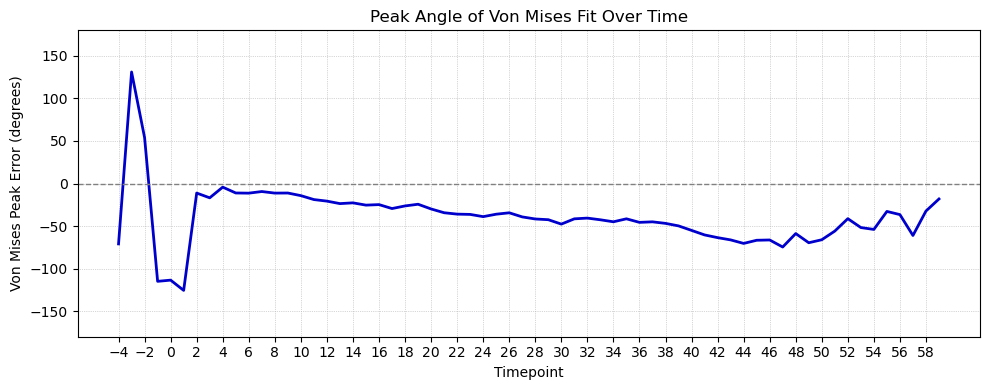

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Assumes `all_timepoints` and `peak_angles` (in degrees) are already defined

plt.figure(figsize=(10, 4))
plt.plot(all_timepoints, peak_angles, color='mediumblue', linewidth=2)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.xlabel("Timepoint")
plt.ylabel("Von Mises Peak Error (degrees)")
plt.title("Peak Angle of Von Mises Fit Over Time")
plt.xticks(all_timepoints[::2])  # Optional: reduce tick clutter
plt.ylim(-180, 180)
plt.grid(True, linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()


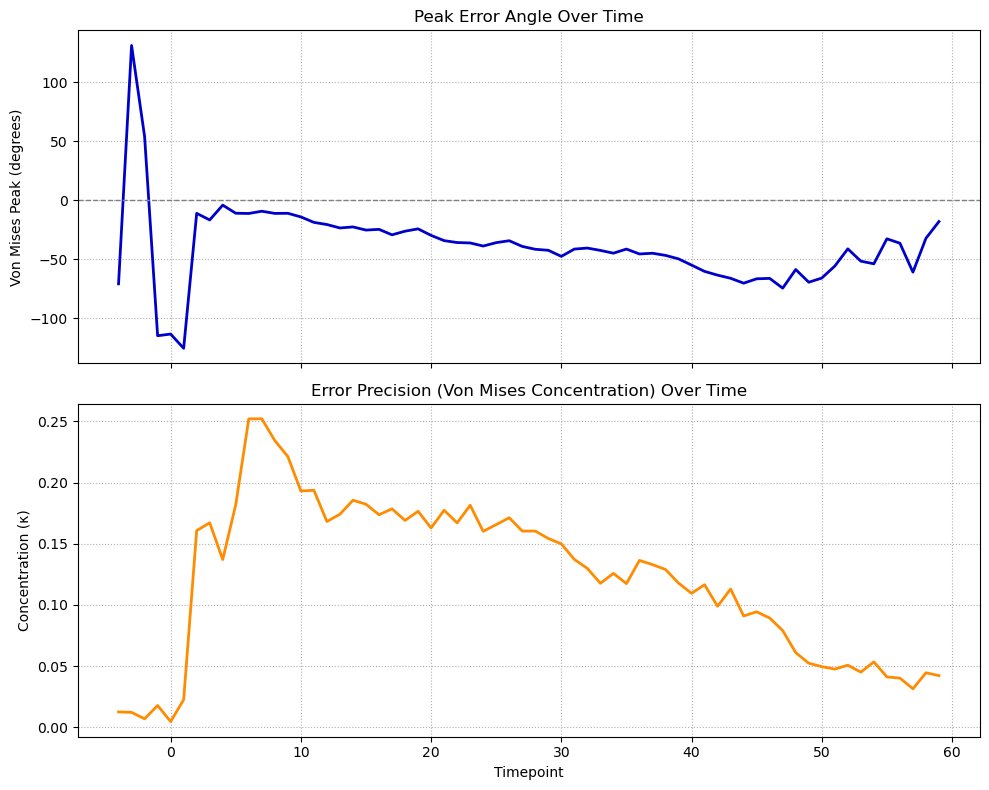

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import vonmises

# Assumes:
# - all_timepoints: sorted array of timepoints
# - subject_data[subj]["errors"]: trial-by-trial errors
# - subject_data[subj]["epochs_mini"].metadata["timepoints"]: time info

peak_angles = np.zeros(len(all_timepoints))
kappas = np.zeros(len(all_timepoints))

for idx, tp in enumerate(all_timepoints):
    all_angles = []

    for subj in subject_data.keys():
        s_errors = subject_data[subj]["errors"]
        trialmat = subject_data[subj]["epochs_mini"].metadata

        time_idx = trialmat[trialmat.timepoints == tp].index.to_numpy()
        toplot = s_errors[time_idx, :].flatten()
        all_angles.extend(toplot)

    all_angles = np.deg2rad(all_angles)

    try:
        kappa, loc, scale = vonmises.fit(all_angles, fscale=1)
        peak_angles[idx] = np.rad2deg(loc)
        kappas[idx] = kappa
    except Exception as e:
        peak_angles[idx] = np.nan
        kappas[idx] = np.nan
        print(f"Fit failed at timepoint {tp}: {e}")

# ---- Plot both metrics ---- #
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Peak angle plot
axs[0].plot(all_timepoints, peak_angles, color='mediumblue', linewidth=2)
axs[0].axhline(0, color='gray', linestyle='--', linewidth=1)
axs[0].set_ylabel("Von Mises Peak (degrees)")
axs[0].set_title("Peak Error Angle Over Time")
axs[0].grid(True, linestyle=':')

# Kappa plot
axs[1].plot(all_timepoints, kappas, color='darkorange', linewidth=2)
axs[1].set_xlabel("Timepoint")
axs[1].set_ylabel("Concentration (κ)")
axs[1].set_title("Error Precision (Von Mises Concentration) Over Time")
axs[1].grid(True, linestyle=':')

plt.tight_layout()
plt.show()


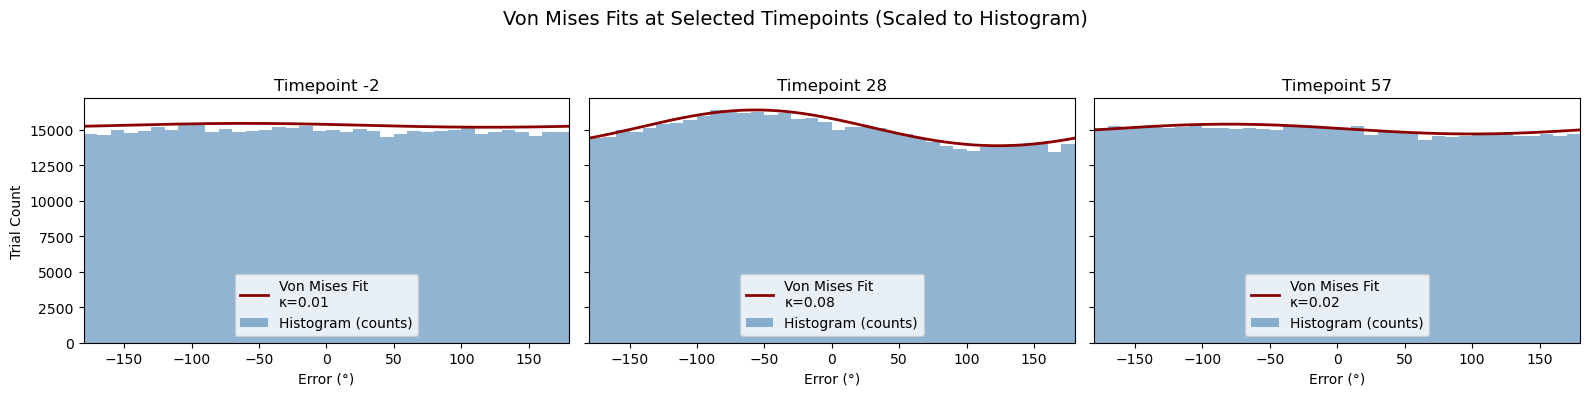

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import vonmises

# Select timepoints: early, middle, late
selected_indices = [2, len(all_timepoints) // 2, len(all_timepoints) - 3]
selected_timepoints = [all_timepoints[i] for i in selected_indices]

# Set up plot
fig, axs = plt.subplots(1, len(selected_timepoints), figsize=(16, 4), sharey=True)

for i, tp in enumerate(selected_timepoints):
    all_angles = []

    for subj in subject_data.keys():
        s_errors = subject_data[subj]["errors"]
        trialmat = subject_data[subj]["epochs_mini"].metadata

        time_idx = trialmat[trialmat.timepoints == tp].index.to_numpy()
        toplot = s_errors[time_idx, :].flatten()
        all_angles.extend(toplot)

    all_angles_rad = np.deg2rad(all_angles)

    # Raw histogram (counts)
    bin_edges = np.linspace(-180, 180, 37)
    hist_vals, _ = np.histogram(all_angles, bins=bin_edges)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    try:
        # Fit von Mises
        kappa, loc, scale = vonmises.fit(all_angles_rad, fscale=1)
        x_fit = np.linspace(-np.pi, np.pi, 300)
        y_fit = vonmises.pdf(x_fit, kappa, loc=loc)
        x_fit_deg = np.rad2deg(x_fit)

        # Scale fit to match histogram peak
        y_fit_scaled = y_fit / np.max(y_fit) * np.max(hist_vals)

        axs[i].bar(bin_centers, hist_vals, width=10, alpha=0.6, label='Histogram (counts)', color='steelblue')
        axs[i].plot(x_fit_deg, y_fit_scaled, color='darkred', linewidth=2, label=f'Von Mises Fit\nκ={kappa:.2f}')
        axs[i].set_xlim(-180, 180)
        axs[i].set_xlabel("Error (°)")
        axs[i].set_title(f"Timepoint {tp}")
        axs[i].legend()
    except Exception as e:
        axs[i].text(0.5, 0.5, f"Fit failed:\n{e}", transform=axs[i].transAxes,
                    ha='center', va='center', color='red')

axs[0].set_ylabel("Trial Count")
plt.suptitle("Von Mises Fits at Selected Timepoints (Scaled to Histogram)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


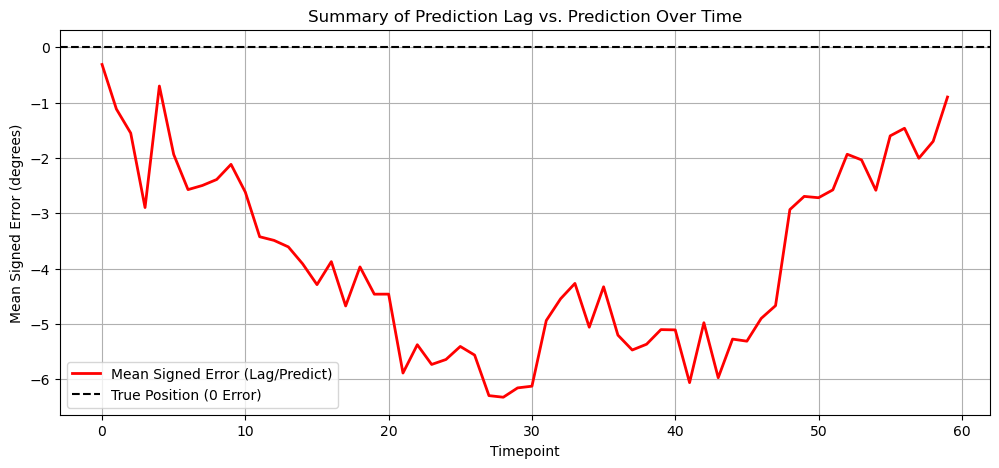

In [37]:
import numpy as np
import matplotlib.pyplot as plt

num_timepoints = 60  # adjust to your data
num_subjects = len(subject_data)

# Initialize array to store mean signed error per timepoint
mean_signed_error = np.zeros(num_timepoints)

for tp in range(num_timepoints):
    all_errors = []

    for subj in subject_data.keys():
        s_errors = subject_data[subj]["errors"]
        trialmat = subject_data[subj]["epochs_mini"].metadata

        time_idx = trialmat[trialmat.timepoints == tp].index.to_numpy()
        toplot = s_errors[time_idx, :].flatten()

        all_errors.extend(toplot)

    # Compute mean signed error (can use np.mean since errors are signed)
    mean_signed_error[tp] = np.mean(all_errors)

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(range(num_timepoints), mean_signed_error, label="Mean Signed Error (Lag/Predict)", color="red", linewidth=2)
plt.axhline(0, color="black", linestyle="--", label="True Position (0 Error)")
plt.xlabel("Timepoint")
plt.ylabel("Mean Signed Error (degrees)")
plt.title("Summary of Prediction Lag vs. Prediction Over Time")
plt.legend()
plt.grid(True)
plt.show()


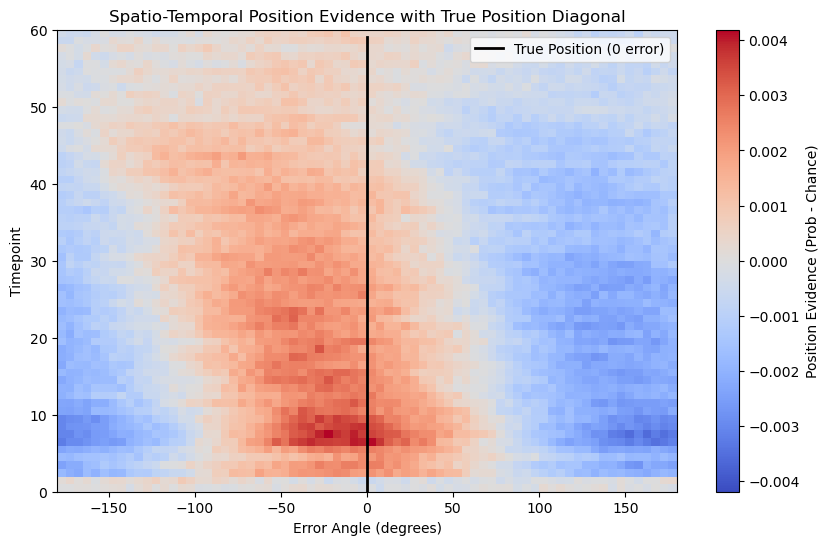

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# hist_matrix shape: (num_timepoints, num_error_bins)
# angle_error: bin edges, length = num_error_bins + 1

num_timepoints, num_bins = hist_matrix.shape

# Compute chance level: uniform probability over bins
chance_level = 1.0 / num_bins

# Convert counts to probabilities (already normalized by subjects),
# then subtract chance to get 'position evidence'
prob_matrix = hist_matrix / np.sum(hist_matrix, axis=1, keepdims=True)
evidence_matrix = prob_matrix - chance_level  # Positive = more than chance, Negative = less

# Plot heatmap
plt.figure(figsize=(10, 6))
extent = [angle_error[0], angle_error[-1], 0, num_timepoints]

im = plt.imshow(
    evidence_matrix,
    aspect='auto',
    cmap='coolwarm',  # Red-blue diverging colormap
    extent=extent,
    origin='lower',
    vmin=-np.max(np.abs(evidence_matrix)),  # Symmetric around zero
    vmax=np.max(np.abs(evidence_matrix))
)
plt.colorbar(im, label='Position Evidence (Prob - Chance)')

plt.xlabel('Error Angle (degrees)')
plt.ylabel('Timepoint')
plt.title('Spatio-Temporal Position Evidence with True Position Diagonal')

# Plot diagonal line: true position (error = 0) across timepoints
# Map timepoint to y-axis and 0 to x-axis
plt.plot(
    np.zeros(num_timepoints),  # x=0 for error=0 line
    np.arange(num_timepoints),
    color='black',
    linewidth=2,
    label='True Position (0 error)'
)
plt.legend()

plt.show()


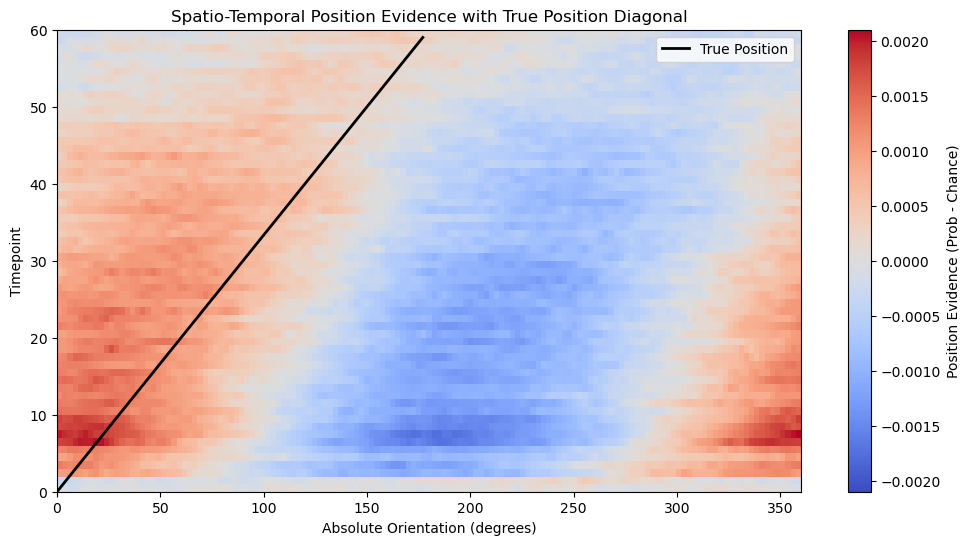

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

num_timepoints, num_bins = hist_matrix.shape

# Parameters
initial_angle = 0
rotation_speed = 3  # degrees per timepoint

# True position at each timepoint
true_positions = (initial_angle + rotation_speed * np.arange(num_timepoints)) % 360

# Define absolute orientation bins (0 to 360 degrees, fine resolution)
abs_orient_bins = np.linspace(0, 360, 2 * num_bins)  # finer bins for interpolation
abs_orient_centers = (abs_orient_bins[:-1] + abs_orient_bins[1:]) / 2

# Original error bin centers
error_bin_centers = (angle_error[:-1] + angle_error[1:]) / 2  # -177.5 to 177.5

# Initialize matrix for absolute orientation evidence
abs_orient_matrix = np.zeros((num_timepoints, len(abs_orient_centers)))

for tp in range(num_timepoints):
    # Shift error bins by true position -> absolute predicted orientation (mod 360)
    shifted_centers = (error_bin_centers + true_positions[tp]) % 360

    # Wrap histogram counts accordingly
    counts = hist_matrix[tp, :]

    # Since shifted_centers are circular, we interpolate counts onto abs_orient_centers
    # To do this, sort shifted_centers & counts by angle
    sorted_idx = np.argsort(shifted_centers)
    sorted_angles = shifted_centers[sorted_idx]
    sorted_counts = counts[sorted_idx]

    # To handle circular wrapping, extend data on both ends
    extended_angles = np.concatenate([sorted_angles - 360, sorted_angles, sorted_angles + 360])
    extended_counts = np.concatenate([sorted_counts, sorted_counts, sorted_counts])

    # Interpolate to abs_orient_centers
    interp_func = interp1d(extended_angles, extended_counts, kind='linear', fill_value=0, bounds_error=False)
    abs_orient_matrix[tp, :] = interp_func(abs_orient_centers)

# Normalize each timepoint to get probabilities
abs_orient_prob = abs_orient_matrix / abs_orient_matrix.sum(axis=1, keepdims=True)

# Compute position evidence by subtracting chance
chance_level = 1.0 / abs_orient_prob.shape[1]
evidence_matrix = abs_orient_prob - chance_level

# Plot heatmap
plt.figure(figsize=(12, 6))
extent = [abs_orient_bins[0], abs_orient_bins[-1], 0, num_timepoints]

im = plt.imshow(
    evidence_matrix,
    aspect='auto',
    cmap='coolwarm',
    extent=extent,
    origin='lower',
    vmin=-np.max(np.abs(evidence_matrix)),
    vmax=np.max(np.abs(evidence_matrix))
)
plt.colorbar(im, label='Position Evidence (Prob - Chance)')

plt.xlabel('Absolute Orientation (degrees)')
plt.ylabel('Timepoint')
plt.title('Spatio-Temporal Position Evidence with True Position Diagonal')

# Plot diagonal line showing true position over time
plt.plot(true_positions, np.arange(num_timepoints), color='black', linewidth=2, label='True Position')

plt.legend()
plt.show()


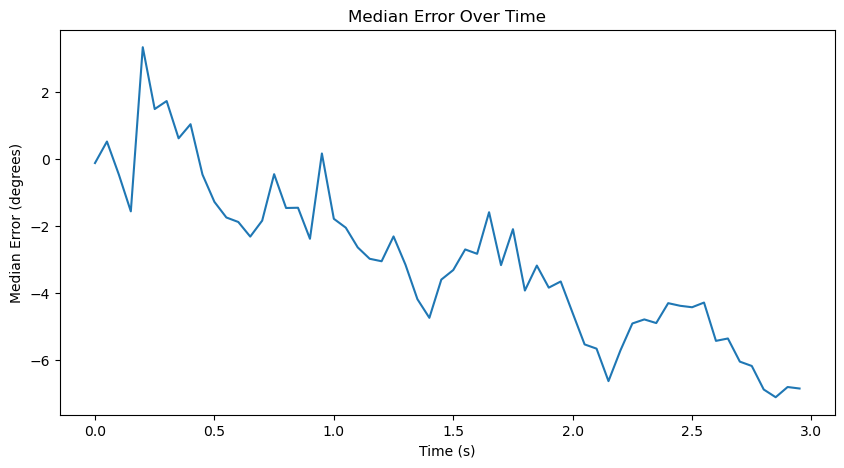

In [6]:
import numpy as np
import matplotlib.pyplot as plt

num_timepoints = 60  # Adjust based on your data
num_subjects = len(subject_data)

# Initialize array to store median errors at each timepoint
median_errors = np.zeros(num_timepoints)

# Loop through timepoints to compute median error
for tp in range(num_timepoints):
    all_errors = []

    for subj in subject_data.keys():
        s_errors = subject_data[subj]["errors"]
        trialmat = subject_data[subj]["epochs_mini"].metadata

        time_idx = trialmat[trialmat.timepoints == tp].index.to_numpy()
        toplot = s_errors[time_idx, :].flatten()

        all_errors.extend(toplot)

    median_errors[tp] = np.median(all_errors)

# Convert timepoints to seconds (assuming 50 ms per timepoint)
time_seconds = np.arange(num_timepoints) * 0.05

# Plot the median error over time (in seconds)
plt.figure(figsize=(10, 5))
plt.plot(time_seconds, median_errors, linestyle="-")
plt.xlabel("Time (s)")
plt.ylabel("Median Error (degrees)")
plt.title("Median Error Over Time")
plt.show()


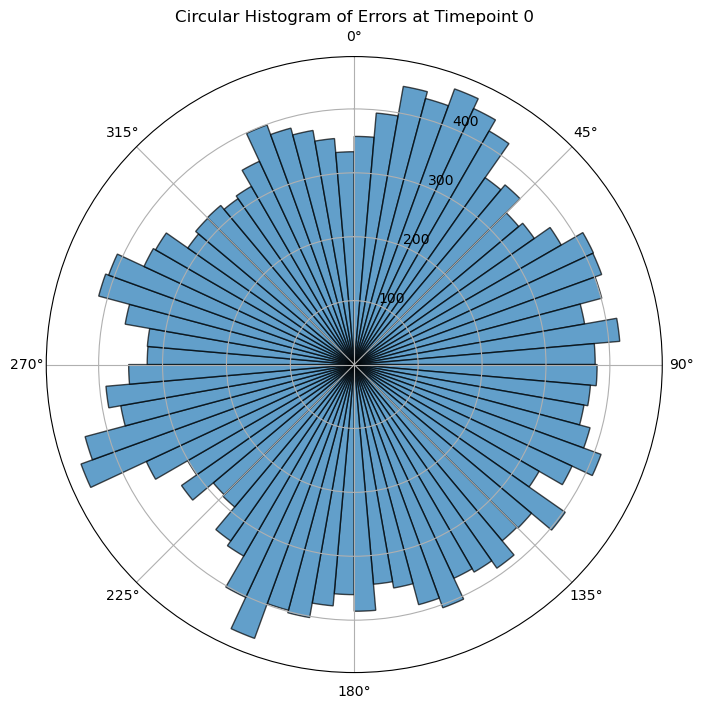

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


s01_errors = subject_data["S02"]["errors"]
trialmat = subject_data["S02"]["epochs_mini"].metadata

tp = 0


time_idx = trialmat[trialmat.timepoints == tp].index.to_numpy()
toplot = s01_errors[time_idx, :].flatten()

angle_error = np.arange(-180, 185, 5)
counts, bin_edges = np.histogram(toplot, bins=angle_error)

# Compute bin centers and convert to radians
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_centers_rad = np.radians(bin_centers)
bin_width_rad = np.radians(5)  # Width of each bin in radians

# Create polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
ax.set_theta_zero_location("N")  # Set 0° at the top
ax.set_theta_direction(-1)  # Set counterclockwise direction

# Plot the histogram as a polar bar plot
ax.bar(bin_centers_rad, counts, width=bin_width_rad, edgecolor="black", alpha=0.7)

ax.set_title(f"Circular Histogram of Errors at Timepoint {tp}")

plt.show()

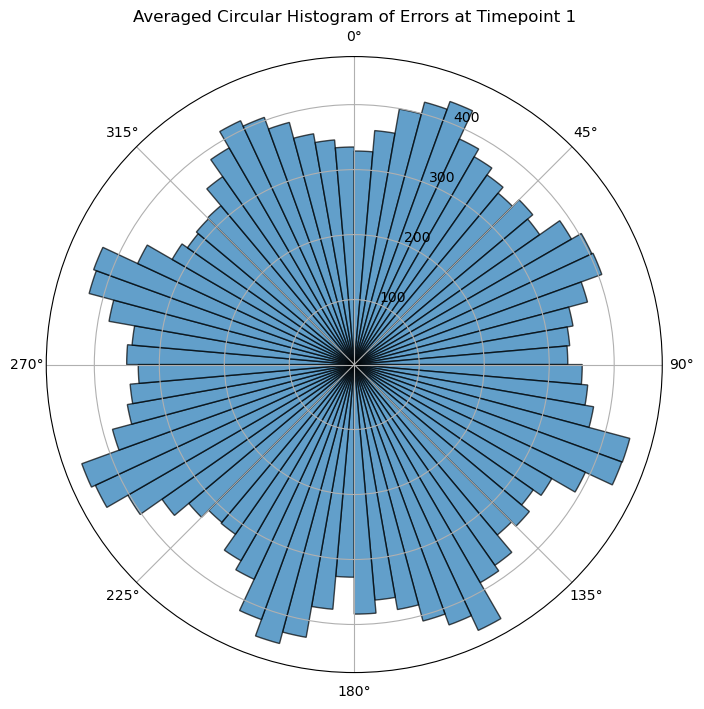

In [45]:
import numpy as np
import matplotlib.pyplot as plt

angle_error = np.arange(-180, 185, 5)  # Bin edges
num_subjects = len(subject_data)

# Initialize histogram counts
all_counts = np.zeros(len(angle_error) - 1)

tp = 1  # Timepoint

# Loop through subjects and accumulate counts
for subj in subject_data.keys():
    s_errors = subject_data[subj]["errors"]
    trialmat = subject_data[subj]["epochs_mini"].metadata

    time_idx = trialmat[trialmat.timepoints == tp].index.to_numpy()
    toplot = s_errors[time_idx, :].flatten()

    counts, _ = np.histogram(toplot, bins=angle_error)
    all_counts += counts  # Sum across subjects

# Compute mean histogram counts
all_counts /= num_subjects  # Normalize

# Compute bin centers and convert to radians
bin_centers = (angle_error[:-1] + angle_error[1:]) / 2
bin_centers_rad = np.radians(bin_centers)
bin_width_rad = np.radians(5)  # Width of each bin in radians

# Create polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
ax.set_theta_zero_location("N")  # Set 0° at the top
ax.set_theta_direction(-1)  # Set counterclockwise direction

# Plot the averaged histogram as a polar bar plot
ax.bar(bin_centers_rad, all_counts, width=bin_width_rad, edgecolor="black", alpha=0.7)

ax.set_title(f"Averaged Circular Histogram of Errors at Timepoint {tp}")

plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re

angle_error = np.arange(-180, 185, 5)  # Bin edges
num_subjects = len(subject_data)

# Initialize histogram counts
all_counts = np.zeros(len(angle_error) - 1)

tp = 0  # Timepoint

# Loop through subjects and accumulate counts
all_conditions = []
for subj in subject_data.keys():
    s_errors = subject_data[subj]["errors"]
    trialmat = subject_data[subj]["epochs_mini"].metadata

    time_idx = trialmat[trialmat.timepoints == tp].index.to_numpy()
    toplot = s_errors[time_idx, :].flatten()

    counts, _ = np.histogram(toplot, bins=angle_error)
    all_counts += counts  # Sum across subjects

    # Extract unique numeric conditions
    all_conditions.extend([
        int(re.search(r'\d+', cond).group()) 
        for cond in trialmat["condition"].unique() if re.search(r'\d+', cond)
    ])

# Compute mean histogram counts
all_counts /= num_subjects  # Normalize

# Compute bin centers and convert to radians
bin_centers = (angle_error[:-1] + angle_error[1:]) / 2
bin_centers_rad = np.radians(bin_centers)
bin_width_rad = np.radians(5)  # Width of each bin in radians

# Get unique conditions and convert to radians
unique_conditions = np.unique(all_conditions)
condition_angles_rad = np.radians(unique_conditions)  # Convert condition numbers to radians

# Create polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
ax.set_theta_zero_location("N")  # Set 0° at the top
ax.set_theta_direction(-1)  # Set counterclockwise direction

# Plot the averaged histogram as a polar bar plot
ax.bar(bin_centers_rad, all_counts, width=bin_width_rad, edgecolor="black", alpha=0.7)

# Add vertical lines for each unique condition
for angle in condition_angles_rad:
    ax.vlines(angle, 0, max(all_counts), colors="red", linestyles="dashed", linewidth=1.5)

ax.set_title(f"Averaged Circular Histogram of Errors at Timepoint {tp}")

plt.show()


NameError: name 'subject_data' is not defined

In [50]:
import re
import numpy as np

# Extract numeric values from the 'condition' column
numeric_conditions = [
    int(re.search(r'\d+', cond).group()) 
    for cond in trialmat["condition"] if re.search(r'\d+', cond)
]

# Get unique numbers
unique_conditions = np.unique(numeric_conditions)
print(unique_conditions)


[ 22  67 112 157 202 247 292 337]


In [54]:
Subject = 'S01'
fn_still = f'sub-{Subject}_Still_preprocessed-epo.fif'

epochs_still = mne.read_epochs(data_path+fn_still)

Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S01_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1104 matching events found
No baseline correction applied
0 projection items activated


In [63]:
# Extract numeric values from 'condition' column
numeric_conditions = [
    int(re.search(r'\d+', cond).group()) 
    for cond in epochs_still.metadata["condition"].unique() if re.search(r'\d+', cond)
]

# Get unique sorted numbers
unique_conditions = np.unique(numeric_conditions)

print(unique_conditions)

[  1  22  45  67  90 112 135 157 180 202 225 247 270 292 315 337]
